# Algoritmo KMeans

## Índice

- [Link para retornar ao notebook principal](#retornar-para-notebook-principal---mainipynb)
- [Importando bibliotecas e pacotes](#importando-bibliotecas-e-pacotes)
- [Importando datasets](#importando-datasets)
- [Testes com o algoritmo](#testes-com-o-algoritmo)
- [Aplicando o algoritmo KMeans](#implementação-do-algoritmo)

## Retornar para notebook principal - main.ipynb

[Link para notebook principal](./main.ipynb)

## Importando bibliotecas e pacotes

In [1]:
from utils.alterar_dataset import deletar_valores_absurdos, preencher_valores_faltantes_linha
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import GridSearchCV
from utils.parametros import ParametrosKmeans
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from models.kmeans import Kmeans
import seaborn as sns
import pandas as pd
import numpy as np

## Importando datasets

In [2]:
df_funcao_renal = pd.read_csv("../databases/raw/InputFuncaoRenal.csv", sep = ",", index_col = "subject_id")
df_dieta_grupos = pd.read_csv("../databases/raw/dva_dieta_grupos.csv", sep = ",", index_col = "subject_id")
df_perfil_hepatico = pd.read_csv("../databases/raw/InputPerfilHepatico.csv", sep = ",", index_col = "subject_id")
df_ureia = pd.read_csv("../databases/processed/ureia_pivoted.csv", sep = ",", index_col = "subject_id")
df_creatinina = pd.read_csv("../databases/processed/creatinina_pivoted.csv", sep = ",", index_col = "subject_id")

## Testes com o Algoritmo

In [3]:
parametros_grid_search = {
    "n_clusters": [i for i in range(2, 14)],
    "init": ["k-means++", "random"],
    "n_init": [1, 2, 3, 4, 5, "auto"],
    "max_iter": [j for j in range(100, 600, 100)],
    "algorithm": ["lloyd", "elkan"]
}

### DATASET Funcao Renal

#### Teste com o GridSearchCV

In [4]:
grid_search = GridSearchCV(estimator = KMeans(),
                           param_grid = parametros_grid_search,
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(df_funcao_renal.values)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_index_)
#print(grid_search.cv_results_)

KMeans(algorithm='elkan', n_clusters=13, n_init=4)
-80.25419918707388
933
{'mean_fit_time': array([0.01933603, 0.01296611, 0.01669741, ..., 0.069807  , 0.08103619,
       0.16183748]), 'std_fit_time': array([0.02064284, 0.00082875, 0.00046133, ..., 0.00764863, 0.00514688,
       0.00706979]), 'mean_score_time': array([0.00275793, 0.00282502, 0.00301409, ..., 0.00310597, 0.00310054,
       0.00319085]), 'std_score_time': array([0.0002106 , 0.00014165, 0.00018473, ..., 0.00011882, 0.00015824,
       0.00018246]), 'param_algorithm': masked_array(data=['lloyd', 'lloyd', 'lloyd', ..., 'elkan', 'elkan',
                   'elkan'],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_init': masked_array(data=['k-means++', 'k-means++', 'k-means++', ..., 'random',
                   'random', 'random'],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'para

#### Teste com iteração por laço `for` utilizando parâmetros do GridSearchCV

In [16]:
soma_dos_quadrados_funcao_renal = []

for i in range(2, 20):
    kmeans = Kmeans(nro_clusters = i,
                    metodo_inicializacao = "k-means++",
                    nro_tentativas_centroides = 4,
                    nro_max_iteracao = 500,
                    tolerancia = 0.0004,
                    semente = 42,
                    algoritmo = "elkan")
    kmeans.fit(df_funcao_renal.values)
    soma_dos_quadrados_funcao_renal.append(kmeans.getDistanciaAoQuadrado())

#### Imprimindo o resultado dos testes

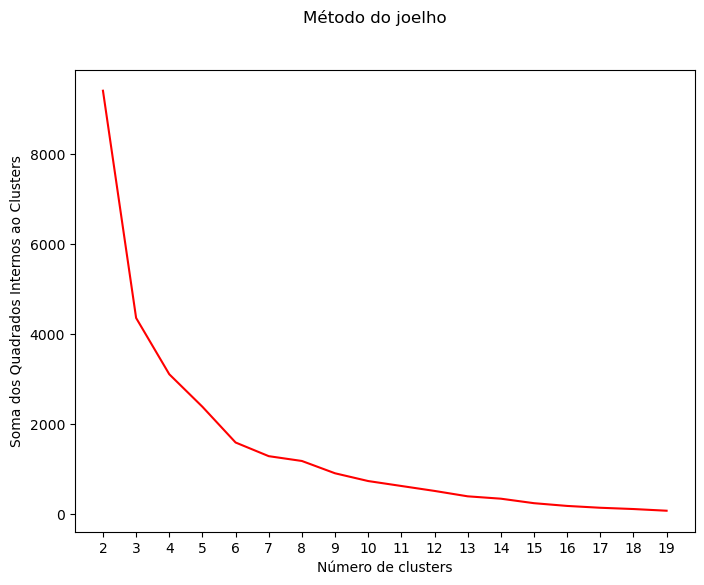

In [20]:
plt.figure(figsize = (8, 6))

plt.suptitle("Método do joelho")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos Quadrados Internos ao Clusters")

plt.plot(range(2, 20), soma_dos_quadrados_funcao_renal, color = "red")
plt.xticks(np.arange(2, 20, step = 1))
plt.show()

No método do joelho acima, podemos notar 4 joelhos:
- x = `3`;
- x = `4`;
- x = `6`;
- x = `7`.

### DATASET Dieta Grupos

#### Teste com o GridSearchCV

In [5]:
grid_search = GridSearchCV(estimator = KMeans(),
                           param_grid = parametros_grid_search,
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(df_dieta_grupos.values)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_index_)
#print(grid_search.cv_results_)

KMeans(init='random', max_iter=200, n_clusters=13, n_init=3)
-129124.7937636682
500


#### Teste com iteração por laço `for` utilizando parâmetros do GridSearchCV

In [7]:
soma_dos_quadrados_dieta_grupos = []

for i in range(2, 20):
    kmeans = Kmeans(nro_clusters = i,
                    metodo_inicializacao = "random",
                    nro_tentativas_centroides = 3,
                    nro_max_iteracao = 200,
                    tolerancia = 0.0004,
                    semente = 42,
                    algoritmo = "lloyd")
    kmeans.fit(df_dieta_grupos.values)
    soma_dos_quadrados_dieta_grupos.append(kmeans.getDistanciaAoQuadrado())

#### Imprimindo o resultado dos testes

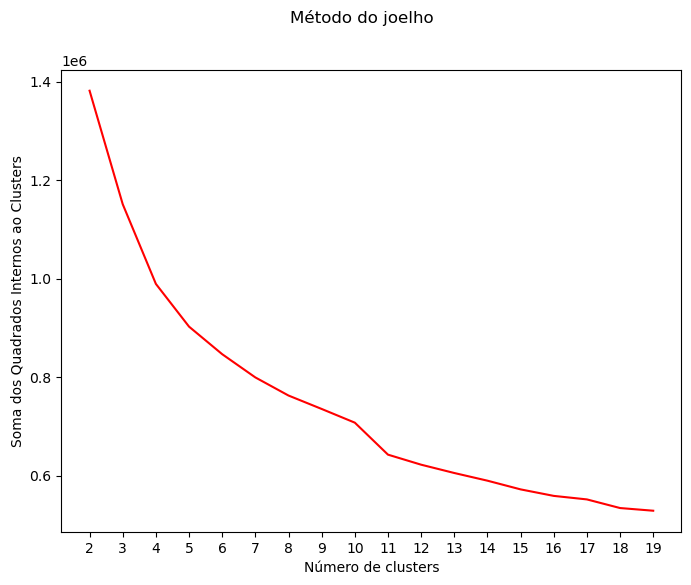

In [9]:
plt.figure(figsize = (8, 6))

plt.suptitle("Método do joelho")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos Quadrados Internos ao Clusters")

plt.plot(range(2, 20), soma_dos_quadrados_dieta_grupos, color = "red")
plt.xticks(np.arange(2, 20, step = 1))
plt.show()

No método do joelho acima, podemos notar 5 joelhos:
- x = `3`;
- x = `4`;
- x = `5`;
- x = `8`;
- x = `11`.

### DATASET Perfil Hepatico

#### Teste com o GridSearchCV

In [10]:
grid_search = GridSearchCV(estimator = KMeans(),
                           param_grid = parametros_grid_search,
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(df_perfil_hepatico.values)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_index_)
#print(grid_search.cv_results_)

KMeans(algorithm='elkan', max_iter=200, n_clusters=13)
-1597.3019400220442
863


/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


#### Teste com iteração por laço `for` utilizando parâmetros do GridSearchCV

In [11]:
soma_dos_quadrados_perfil_hepatico = []

for i in range(2, 20):
    kmeans = Kmeans(nro_clusters = i,
                    metodo_inicializacao = "k-means++",
                    nro_tentativas_centroides = 3,
                    nro_max_iteracao = 200,
                    tolerancia = 0.0004,
                    semente = 42,
                    algoritmo = "elkan")
    kmeans.fit(df_perfil_hepatico.values)
    soma_dos_quadrados_perfil_hepatico.append(kmeans.getDistanciaAoQuadrado())

#### Imprimindo o resultado dos testes

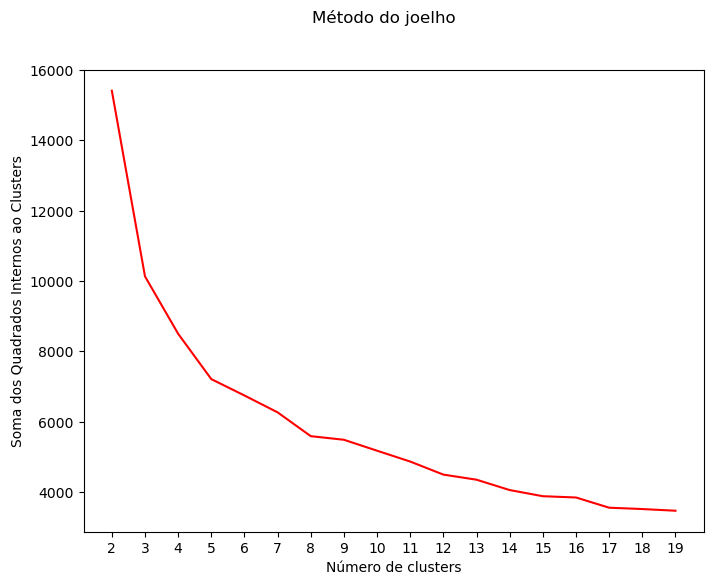

In [12]:
plt.figure(figsize = (8, 6))

plt.suptitle("Método do joelho")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos Quadrados Internos ao Clusters")

plt.plot(range(2, 20), soma_dos_quadrados_perfil_hepatico, color = "red")
plt.xticks(np.arange(2, 20, step = 1))
plt.show()

No método do joelho acima, podemos notar 6 joelhos:
- x = `3`;
- x = `5`;
- x = `8`;
- x = `12`;
- x = `15`;
- x = `17`.

### DATASET ureia

#### Removendo valores outliers do dataset e os substituindo por `np.nan`

In [4]:
novo_df_ureia_tratado = deletar_valores_absurdos(df_ureia, df_ureia.max().max())
novo_df_ureia_tratado.max()

ureia_dia_1    212.0
ureia_dia_2    162.0
ureia_dia_3    171.0
ureia_dia_4    184.0
ureia_dia_5    182.0
ureia_dia_6    206.0
ureia_dia_7    195.0
dtype: float64

#### Iterando pelo dataset e inserindo dados de dias anteriores em dias posteriores que contém dados nulos

In [5]:
novo_df_ureia_tratado = preencher_valores_faltantes_linha(novo_df_ureia_tratado)
novo_df_ureia_tratado.head(10)

,ureia_dia_1,ureia_dia_2,ureia_dia_3,ureia_dia_4,ureia_dia_5,ureia_dia_6,ureia_dia_7
subject_id,,,,,,,
10001884,30.0,30.0,38.0,31.0,26.0,22.0,14.0
10004422,21.0,13.0,17.0,16.0,20.0,24.0,24.0
10004733,44.0,41.0,39.0,37.0,28.0,26.0,28.0
10005606,6.0,6.0,10.0,6.0,11.0,11.0,15.0
10010867,8.0,5.0,5.0,5.0,6.0,7.0,9.0
10019777,17.0,22.0,16.0,19.0,18.0,17.0,16.0
10020944,34.0,28.0,26.0,22.0,21.0,20.0,19.0
10023486,42.0,48.0,54.0,63.0,68.0,69.0,70.0
10032381,9.0,9.0,9.0,14.0,21.0,24.0,26.0


In [6]:
novo_df_ureia_tratado.isna().sum()

ureia_dia_1    21
ureia_dia_2     2
ureia_dia_3     5
ureia_dia_4     5
ureia_dia_5     7
ureia_dia_6    12
ureia_dia_7    32
dtype: int64

#### Deletando linhas que contém valores nulos - mesmo depois da inserção de dados artificiais

In [7]:
novo_df_ureia_tratado[novo_df_ureia_tratado.isna().any(axis = 1)].index

Index([10344732, 10463546, 10477920, 10553635, 10583686, 10615339, 10996857,
       11542534, 11611745, 11638303, 11663336, 11833476, 12344021, 12374214,
       12606435, 12934260, 13679248, 13681485, 13824877, 13827765, 13911200,
       14363068, 14383658, 14623418, 14691603, 14696918, 14785854, 14816630,
       15090519, 15158294, 15204620, 15409850, 15455733, 15583807, 15640315,
       15763754, 15993533, 16327028, 16832227, 17131210, 17327554, 17484283,
       17635990, 17718694, 17803326, 18135694, 18152377, 18213765, 18560897,
       18638524, 18757959, 18976063, 19392949, 19571102, 19571265, 19694231],
      dtype='int64', name='subject_id')

In [8]:
novo_df_ureia_tratado = novo_df_ureia_tratado.dropna(axis = 0)
novo_df_ureia_tratado.isna().sum().sum()

0

#### Teste com o GridSearchCV

In [7]:
grid_search = GridSearchCV(estimator = KMeans(),
                           param_grid = parametros_grid_search,
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(novo_df_ureia_tratado)

print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_index_)

KMeans(algorithm='elkan', max_iter=100, n_clusters=12)
-799792893372.1405
785


#### Teste com iteração por laço `for` utilizando parâmetros do GridSearchCV

In [18]:
soma_dos_quadrados_ureia = []

for i in range(2, 20):
    kmeans = Kmeans(nro_clusters = i,
                    metodo_inicializacao = "k-means++",
                    nro_tentativas_centroides = 12,
                    nro_max_iteracao = 100,
                    tolerancia = 0.0004,
                    semente = 42,
                    algoritmo = "elkan")
    kmeans.fit(novo_df_ureia_tratado)
    soma_dos_quadrados_ureia.append(kmeans.getDistanciaAoQuadrado())

#### Imprimindo o resultado dos testes

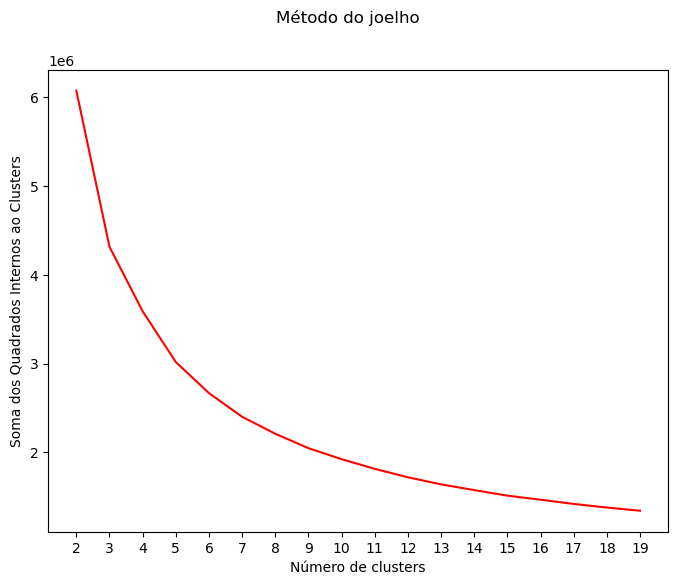

In [19]:
plt.figure(figsize = (8, 6))

plt.suptitle("Método do joelho")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos Quadrados Internos ao Clusters")

plt.plot(range(2, 20), soma_dos_quadrados_ureia, color = "red")
plt.xticks(np.arange(2, 20, step = 1))
plt.show()

No método do joelho acima, podemos notar 6 joelhos:
- x = `3`;
- x = `5`;
- x = `8`;
- x = `12`;
- x = `15`;
- x = `17`.

### DATASET creatinina

#### Removendo valores outliers do dataset e os substituindo por `np.nan`

In [9]:
novo_df_creatinina_tratado = deletar_valores_absurdos(df_creatinina, df_creatinina.max().max())
novo_df_creatinina_tratado.max()

creatinina_dia_1    117.0
creatinina_dia_2     16.0
creatinina_dia_3     15.0
creatinina_dia_4     14.6
creatinina_dia_5     14.7
creatinina_dia_6     15.2
creatinina_dia_7     15.6
dtype: float64

#### Iterando pelo dataset e inserindo dados de dias anteriores em dias posteriores que contém dados nulos

In [10]:
novo_df_creatinina_tratado = preencher_valores_faltantes_linha(novo_df_creatinina_tratado)
novo_df_creatinina_tratado.head(10)

,creatinina_dia_1,creatinina_dia_2,creatinina_dia_3,creatinina_dia_4,creatinina_dia_5,creatinina_dia_6,creatinina_dia_7
subject_id,,,,,,,
10001884,1.1,1.1,1.3,0.9,0.8,0.6,0.5
10004422,0.7,0.7,0.7,0.6,0.6,0.7,0.7
10004733,3.4,3.8,3.7,3.4,2.6,2.6,2.7
10005606,0.7,0.6,0.5,0.4,0.5,0.5,0.5
10010867,0.7,0.7,0.5,0.3,0.4,0.5,0.5
10019777,0.9,0.7,0.9,0.8,0.7,0.6,0.5
10020944,1.4,1.6,1.8,1.6,1.5,1.8,1.6
10023486,3.1,3.4,3.2,3.4,2.8,2.2,1.9
10032381,1.3,1.2,1.2,1.2,1.2,1.2,1.2


In [11]:
novo_df_creatinina_tratado.isna().sum()

creatinina_dia_1    17
creatinina_dia_2     2
creatinina_dia_3     5
creatinina_dia_4     5
creatinina_dia_5     7
creatinina_dia_6    12
creatinina_dia_7    33
dtype: int64

#### Deletando linhas que contém valores nulos - mesmo depois da inserção de dados artificiais

In [12]:
novo_df_creatinina_tratado[novo_df_creatinina_tratado.isna().any(axis = 1)].index

Index([10344732, 10463546, 10477920, 10553635, 10615339, 10996857, 11542534,
       11611745, 11638303, 11663336, 11833476, 12344021, 12374214, 12606435,
       12917345, 12934260, 13679248, 13681485, 13824877, 13827765, 13911200,
       14363068, 14383658, 14623418, 14691603, 14696918, 14785854, 14816630,
       15090519, 15158294, 15204620, 15409850, 15455733, 15583807, 15640315,
       15763754, 15993533, 16327028, 16832227, 17131210, 17327554, 17484283,
       17635990, 17718694, 17803326, 18135694, 18152377, 18560897, 18638524,
       18757959, 19571102, 19571265, 19694231],
      dtype='int64', name='subject_id')

In [13]:
novo_df_creatinina_tratado = novo_df_creatinina_tratado.dropna(axis = 0)
novo_df_creatinina_tratado.isna().sum().sum()

0

#### Teste com o GridSearchCV

In [11]:
grid_search = GridSearchCV(estimator = KMeans(),
                           param_grid = parametros_grid_search,
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(novo_df_creatinina_tratado)

print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_index_)

KMeans(algorithm='elkan', max_iter=500, n_clusters=13)
-199994984113.73712
1079


#### Teste com iteração por laço `for` utilizando parâmetros do GridSearchCV

In [16]:
soma_dos_quadrados_creatinina = []

for i in range(2, 20):
    kmeans = Kmeans(nro_clusters = i,
                    metodo_inicializacao = "k-means++",
                    nro_tentativas_centroides = 13,
                    nro_max_iteracao = 500,
                    tolerancia = 0.0004,
                    semente = 42,
                    algoritmo = "elkan")
    kmeans.fit(novo_df_creatinina_tratado)
    soma_dos_quadrados_creatinina.append(kmeans.getDistanciaAoQuadrado())

#### Imprimindo o resultado dos testes

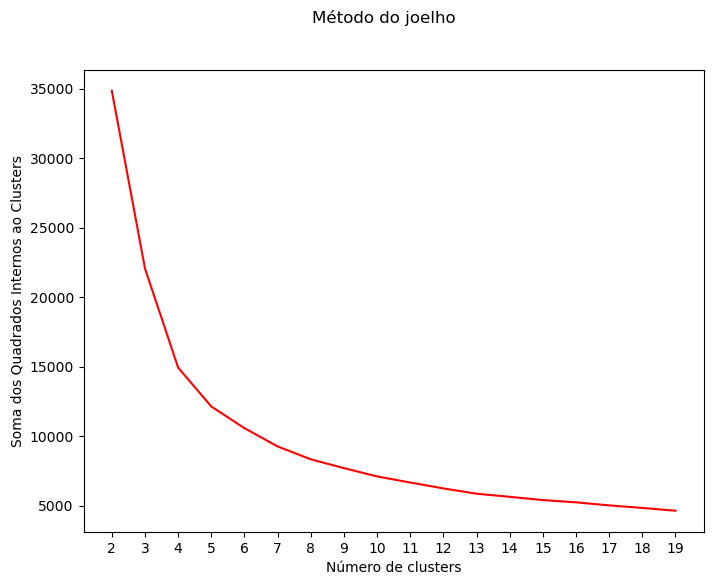

In [17]:
plt.figure(figsize = (8, 6))

plt.suptitle("Método do joelho")
plt.xlabel("Número de clusters")
plt.ylabel("Soma dos Quadrados Internos ao Clusters")

plt.plot(range(2, 20), soma_dos_quadrados_creatinina, color = "red")
plt.xticks(np.arange(2, 20, step = 1))
plt.show()

No método do joelho acima, podemos um único joelho em:
- x = `4`.

## Implementação do Algoritmo

### DATASET Funcao Renal

#### Recebendo os hiper-parâmetros testados acima

In [4]:
hiperparametros_kmeans = ParametrosKmeans(path_arquivo_hiperparametros =  "./hiperparametros/hiperparametros_kmeans.txt", nome_dataset = "funcao_renal")

#### Criando o modelo - seguindo o GridSearchCV

In [27]:
kmeans_funcao_renal = Kmeans(nro_clusters = hiperparametros_kmeans.getNro_clusters(),
                             metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                             nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                             nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                             tolerancia = hiperparametros_kmeans.getTolerancia(),
                             semente = hiperparametros_kmeans.getSemente_randomica(),
                             algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_funcao_renal.fit(df_funcao_renal.values)

KMeans(algorithm='elkan', max_iter=500, n_clusters=13, n_init=4,
       random_state=42, tol=0.0004)

##### Verificando resultados do modelo - GridSearchCV

In [28]:
print("Inercia: %.3f" % kmeans_funcao_renal.getDistanciaAoQuadrado())
print("Labels: ", kmeans_funcao_renal.getLabels())

Inercia: 389.541
Labels:  [0 0 0 ... 6 4 0]


In [29]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_funcao_renal = kmeans_funcao_renal.fit_predict(df_funcao_renal.values)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(df_funcao_renal.values, y_funcao_renal, metric = metrica))

davies_bouldin = davies_bouldin_score(df_funcao_renal.values, y_funcao_renal)
calinski = calinski_harabasz_score(df_funcao_renal.values, y_funcao_renal)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.916432991070862, 0.06138797315388123, 0.9156730802047989, 0.916432991070862, 0.9156730802047989, 0.916432991070862]
DAVIS-BOULDIN SCORE:  0.503934100967088
CALINSKI-HARABASZ SCORE:  53939.28151577068


#### Criando o modelo - seguindo o método do joelho

In [30]:
joelhos_percebidos = [3, 4, 6, 7]

for i in joelhos_percebidos:
    kmeans_funcao_renal = Kmeans(nro_clusters = i,
                                metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                                nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                                nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                                tolerancia = hiperparametros_kmeans.getTolerancia(),
                                semente = hiperparametros_kmeans.getSemente_randomica(),
                                algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

    kmeans_funcao_renal.fit(df_funcao_renal.values)
    print("Inercia: %.3f" % kmeans_funcao_renal.getDistanciaAoQuadrado())
    print("Labels: ", kmeans_funcao_renal.getLabels())

Inercia: 4354.136
Labels:  [0 0 0 ... 0 2 0]
Inercia: 3103.162
Labels:  [0 0 0 ... 3 2 0]
Inercia: 1585.942
Labels:  [0 0 0 ... 5 2 0]
Inercia: 1282.181
Labels:  [0 0 0 ... 6 5 0]


Acima, podemos notar que, a partir de `x = 6`, o ganho adicional é muito pequeno. Então para otimização dos testes `6` será escolhido como número de clusters.

In [31]:
kmeans_funcao_renal = Kmeans(nro_clusters = 6,
                             metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                             nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                             nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                             tolerancia = hiperparametros_kmeans.getTolerancia(),
                             semente = hiperparametros_kmeans.getSemente_randomica(),
                             algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_funcao_renal.fit(df_funcao_renal.values)

KMeans(algorithm='elkan', max_iter=500, n_clusters=6, n_init=4, random_state=42,
       tol=0.0004)

##### Verificando resultados do modelo - Metodo do Joelho

In [32]:
print("Inercia: %.3f" % kmeans_funcao_renal.getDistanciaAoQuadrado())
print("Labels: ", kmeans_funcao_renal.getLabels())

Inercia: 1585.942
Labels:  [0 0 0 ... 5 2 0]


In [33]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_funcao_renal = kmeans_funcao_renal.fit_predict(df_funcao_renal.values)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(df_funcao_renal.values, y_funcao_renal, metric = metrica))

davies_bouldin = davies_bouldin_score(df_funcao_renal.values, y_funcao_renal)
calinski = calinski_harabasz_score(df_funcao_renal.values, y_funcao_renal)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.7773957623742003, 0.09648184484186509, 0.7785646342027243, 0.7773957623742003, 0.7785646342027243, 0.7773957623742003]
DAVIS-BOULDIN SCORE:  0.6438692786026571
CALINSKI-HARABASZ SCORE:  30696.880328426898


### DATASET Dieta Grupos

#### Recebendo os hiper-parâmetros testados acima

In [20]:
hiperparametros_kmeans = ParametrosKmeans(path_arquivo_hiperparametros =  "./hiperparametros/hiperparametros_kmeans.txt", nome_dataset = "dieta_grupos")

#### Criando o modelo - seguindo o GridSearchCV

In [21]:
kmeans_dieta_grupos = Kmeans(nro_clusters = hiperparametros_kmeans.getNro_clusters(),
                             metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                             nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                             nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                             tolerancia = hiperparametros_kmeans.getTolerancia(),
                             semente = hiperparametros_kmeans.getSemente_randomica(),
                             algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_dieta_grupos.fit(df_dieta_grupos.values)

KMeans(init='random', max_iter=200, n_clusters=13, n_init=3, random_state=42,
       tol=0.0004)

##### Verificando resultados do modelo - GridSearchCV

In [22]:
print("Inercia: %.3f" % kmeans_dieta_grupos.getDistanciaAoQuadrado())
print("Labels: ", kmeans_dieta_grupos.getLabels())

Inercia: 605444.076
Labels:  [ 6  5 10 ...  4  3 10]


In [23]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_dieta_grupos = kmeans_dieta_grupos.fit_predict(df_dieta_grupos.values)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(df_dieta_grupos.values, y_dieta_grupos, metric = metrica))

davies_bouldin = davies_bouldin_score(df_dieta_grupos.values, y_dieta_grupos)
calinski = calinski_harabasz_score(df_dieta_grupos.values, y_dieta_grupos)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.2237785923896099, -0.14017645312345056, 0.24362133868822045, 0.2237785923896099, 0.24362133868822045, 0.2237785923896099]
DAVIS-BOULDIN SCORE:  1.4487466883155198
CALINSKI-HARABASZ SCORE:  813.0685221478985


#### Criando o modelo - seguindo o método do joelho

In [24]:
joelhos_percebidos = [3, 4, 5, 8, 11]

for i in joelhos_percebidos:
    kmeans_dieta_grupos = Kmeans(nro_clusters = i,
                                 metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                                 nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                                 nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                                 tolerancia = hiperparametros_kmeans.getTolerancia(),
                                 semente = hiperparametros_kmeans.getSemente_randomica(),
                                 algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

    kmeans_dieta_grupos.fit(df_dieta_grupos.values)
    print("Inercia: %.3f" % kmeans_dieta_grupos.getDistanciaAoQuadrado())
    print("Labels: ", kmeans_dieta_grupos.getLabels())

Inercia: 1151207.318
Labels:  [2 0 1 ... 2 0 1]
Inercia: 989404.496
Labels:  [2 0 3 ... 2 0 3]
Inercia: 902650.675
Labels:  [4 0 2 ... 4 0 2]
Inercia: 762747.706
Labels:  [1 2 0 ... 1 0 7]
Inercia: 642709.617
Labels:  [ 8  6 10 ...  8  5 10]


Acima, podemos notar que, a partir de `x = 11`, o ganho adicional é muito pequeno. Então para otimização dos testes `11` será escolhido como número de clusters.

In [25]:
kmeans_dieta_grupos = Kmeans(nro_clusters = 11,
                             metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                             nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                             nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                             tolerancia = hiperparametros_kmeans.getTolerancia(),
                             semente = hiperparametros_kmeans.getSemente_randomica(),
                             algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_dieta_grupos.fit(df_dieta_grupos.values)

KMeans(init='random', max_iter=200, n_clusters=11, n_init=3, random_state=42,
       tol=0.0004)

##### Verificando resultados do modelo - Metodo do Joelho

In [27]:
print("Inercia: %.3f" % kmeans_dieta_grupos.getDistanciaAoQuadrado())
print("Labels: ", kmeans_dieta_grupos.getLabels())

Inercia: 642709.617
Labels:  [ 8  6 10 ...  8  5 10]


In [28]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_dieta_grupos = kmeans_dieta_grupos.fit_predict(df_dieta_grupos.values)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(df_dieta_grupos.values, y_dieta_grupos, metric = metrica))

davies_bouldin = davies_bouldin_score(df_dieta_grupos.values, y_dieta_grupos)
calinski = calinski_harabasz_score(df_dieta_grupos.values, y_dieta_grupos)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.22969157597737852, -0.16290378563019012, 0.24763493631266295, 0.22969157597737852, 0.24763493631266295, 0.22969157597737852]
DAVIS-BOULDIN SCORE:  1.3936275354381118
CALINSKI-HARABASZ SCORE:  900.5063587284429


### DATASET Perfil Hepatico

#### Recebendo os hiper-parâmetros testados acima

In [29]:
hiperparametros_kmeans = ParametrosKmeans(path_arquivo_hiperparametros =  "./hiperparametros/hiperparametros_kmeans.txt", nome_dataset = "perfil_hepatico")

#### Criando o modelo - seguindo o GridSearchCV

In [30]:
kmeans_perfil_hepatico = Kmeans(nro_clusters = hiperparametros_kmeans.getNro_clusters(),
                                metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                                nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                                nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                                tolerancia = hiperparametros_kmeans.getTolerancia(),
                                semente = hiperparametros_kmeans.getSemente_randomica(),
                                algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_perfil_hepatico.fit(df_perfil_hepatico.values)

KMeans(algorithm='elkan', max_iter=200, n_clusters=13, n_init=3,
       random_state=42, tol=0.0004)

##### Verificando resultados do modelo - GridSearchCV

In [31]:
print("Inercia: %.3f" % kmeans_perfil_hepatico.getDistanciaAoQuadrado())
print("Labels: ", kmeans_perfil_hepatico.getLabels())

Inercia: 4351.758
Labels:  [ 4  4  4 ...  3  7 11]


In [32]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_perfil_hepatico = kmeans_perfil_hepatico.fit_predict(df_perfil_hepatico.values)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(df_perfil_hepatico.values, y_perfil_hepatico, metric = metrica))

davies_bouldin = davies_bouldin_score(df_perfil_hepatico.values, y_perfil_hepatico)
calinski = calinski_harabasz_score(df_perfil_hepatico.values, y_perfil_hepatico)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.5940908566917005, -0.045691752560986336, 0.5778983780633224, 0.5940908566917005, 0.5778983780633224, 0.5940908566917005]
DAVIS-BOULDIN SCORE:  1.2022516360203914
CALINSKI-HARABASZ SCORE:  4186.371043210966


#### Criando o modelo - seguindo o método do joelho

In [33]:
joelhos_percebidos = [3, 4, 5, 8, 11]

for i in joelhos_percebidos:
    kmeans_perfil_hepatico = Kmeans(nro_clusters = i,
                                    metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                                    nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                                    nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                                    tolerancia = hiperparametros_kmeans.getTolerancia(),
                                    semente = hiperparametros_kmeans.getSemente_randomica(),
                                    algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

    kmeans_perfil_hepatico.fit(df_perfil_hepatico.values)
    print("Inercia: %.3f" % kmeans_perfil_hepatico.getDistanciaAoQuadrado())
    print("Labels: ", kmeans_perfil_hepatico.getLabels())

Inercia: 10133.479
Labels:  [1 1 1 ... 0 0 2]
Inercia: 8502.242
Labels:  [3 3 3 ... 2 1 2]
Inercia: 7212.032
Labels:  [0 0 0 ... 2 2 4]
Inercia: 5589.548
Labels:  [3 3 3 ... 1 1 2]
Inercia: 4867.509
Labels:  [ 0  0  0 ...  9  4 10]


Acima, podemos notar que, a partir de `x = 3`, o ganho adicional é muito pequeno. Então para otimização dos testes `3` será escolhido como número de clusters.

In [34]:
kmeans_perfil_hepatico = Kmeans(nro_clusters = 3,
                                metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                                nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                                nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                                tolerancia = hiperparametros_kmeans.getTolerancia(),
                                semente = hiperparametros_kmeans.getSemente_randomica(),
                                algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_perfil_hepatico.fit(df_perfil_hepatico.values)

KMeans(algorithm='elkan', max_iter=200, n_clusters=5, n_init=3, random_state=42,
       tol=0.0004)

##### Verificando resultados do modelo - Metodo do Joelho

In [37]:
print("Inercia: %.3f" % kmeans_dieta_grupos.getDistanciaAoQuadrado())
print("Labels: ", kmeans_dieta_grupos.getLabels())

Inercia: 642709.617
Labels:  [ 8  6 10 ...  8  5 10]


In [38]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_perfil_hepatico = kmeans_perfil_hepatico.fit_predict(df_perfil_hepatico.values)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(df_perfil_hepatico.values, y_perfil_hepatico, metric = metrica))

davies_bouldin = davies_bouldin_score(df_perfil_hepatico.values, y_perfil_hepatico)
calinski = calinski_harabasz_score(df_perfil_hepatico.values, y_perfil_hepatico)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.5942696516792365, -0.02486884645945266, 0.5530078225728373, 0.5942696516792365, 0.5530078225728373, 0.5942696516792365]
DAVIS-BOULDIN SCORE:  1.0874692392701475
CALINSKI-HARABASZ SCORE:  6843.875348769018


### DATASET ureia

#### Recebendo os hiper-parâmetros testados acima

In [14]:
hiperparametros_kmeans = ParametrosKmeans(path_arquivo_hiperparametros =  "./hiperparametros/hiperparametros_kmeans.txt", nome_dataset = "ureia")

#### Criando o modelo - seguindo o GridSearchCV

In [15]:
kmeans_ureia = Kmeans(nro_clusters = hiperparametros_kmeans.getNro_clusters(),
                      metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                      nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                      nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                      tolerancia = hiperparametros_kmeans.getTolerancia(),
                      semente = hiperparametros_kmeans.getSemente_randomica(),
                      algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_ureia.fit(novo_df_ureia_tratado)

KMeans(algorithm='elkan', max_iter=100, n_clusters=3, n_init=12,
       random_state=42, tol=0.0004)

##### Verificando resultados do modelo - GridSearchCV

In [16]:
print("Inercia: %.3f" % kmeans_ureia.getDistanciaAoQuadrado())
print("Labels: ", kmeans_ureia.getLabels())

Inercia: 4316373.960
Labels:  [0 0 2 ... 0 0 0]


In [17]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_ureia = kmeans_ureia.fit_predict(novo_df_ureia_tratado)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(novo_df_ureia_tratado, y_ureia, metric = metrica))

davies_bouldin = davies_bouldin_score(novo_df_ureia_tratado, y_ureia)
calinski = calinski_harabasz_score(novo_df_ureia_tratado, y_ureia)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.4801375286468505, -0.07877357589678656, 0.4621597284751981, 0.4801375286468505, 0.4621597284751981, 0.4801375286468505]
DAVIS-BOULDIN SCORE:  0.9447154688825293
CALINSKI-HARABASZ SCORE:  3475.950257184427


#### Criando o modelo - seguindo o método do joelho

In [18]:
joelhos_percebidos = [3, 4, 5, 8, 11]

for i in joelhos_percebidos:
    kmeans_ureia = Kmeans(nro_clusters = i,
                          metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                          nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                          nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                          tolerancia = hiperparametros_kmeans.getTolerancia(),
                          semente = hiperparametros_kmeans.getSemente_randomica(),
                          algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

    kmeans_ureia.fit(novo_df_ureia_tratado)
    print("Inercia: %.3f" % kmeans_ureia.getDistanciaAoQuadrado())
    print("Labels: ", kmeans_ureia.getLabels())

Inercia: 4316373.960
Labels:  [0 0 2 ... 0 0 0]
Inercia: 3589647.474
Labels:  [3 0 3 ... 0 0 0]
Inercia: 3018186.067
Labels:  [3 1 3 ... 1 3 1]
Inercia: 2210208.435
Labels:  [0 0 3 ... 7 0 7]
Inercia: 1814625.989
Labels:  [10  1  4 ...  9 10  1]


Acima, podemos notar que, a partir de `x = 3`, o ganho adicional é muito pequeno. Então para otimização dos testes `3` será escolhido como número de clusters. Todavia, foi notado no algoritmo Mean Shift que a partir de `2` clusteres, não há ganho real, então `2` será o número escolhido de clusteres.

In [19]:
kmeans_ureia = Kmeans(nro_clusters = 2,
                      metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                      nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                      nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                      tolerancia = hiperparametros_kmeans.getTolerancia(),
                      semente = hiperparametros_kmeans.getSemente_randomica(),
                      algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

y_ureia = kmeans_ureia.fit_predict(novo_df_ureia_tratado)

##### Verificando resultados do modelo - Metodo do Joelho

In [20]:
print("Inercia: %.3f" % kmeans_ureia.getDistanciaAoQuadrado())
print("Labels: ", kmeans_ureia.getLabels())

Inercia: 6074338.451
Labels:  [0 0 0 ... 0 0 0]


In [21]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(novo_df_ureia_tratado, y_ureia, metric = metrica))

davies_bouldin = davies_bouldin_score(novo_df_ureia_tratado, y_ureia)
calinski = calinski_harabasz_score(novo_df_ureia_tratado, y_ureia)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.5942762687770881, 0.0015828075111705064, 0.5749230121199269, 0.5942762687770881, 0.5749230121199269, 0.5942762687770881]
DAVIS-BOULDIN SCORE:  0.774941471124468
CALINSKI-HARABASZ SCORE:  3998.8794084131573


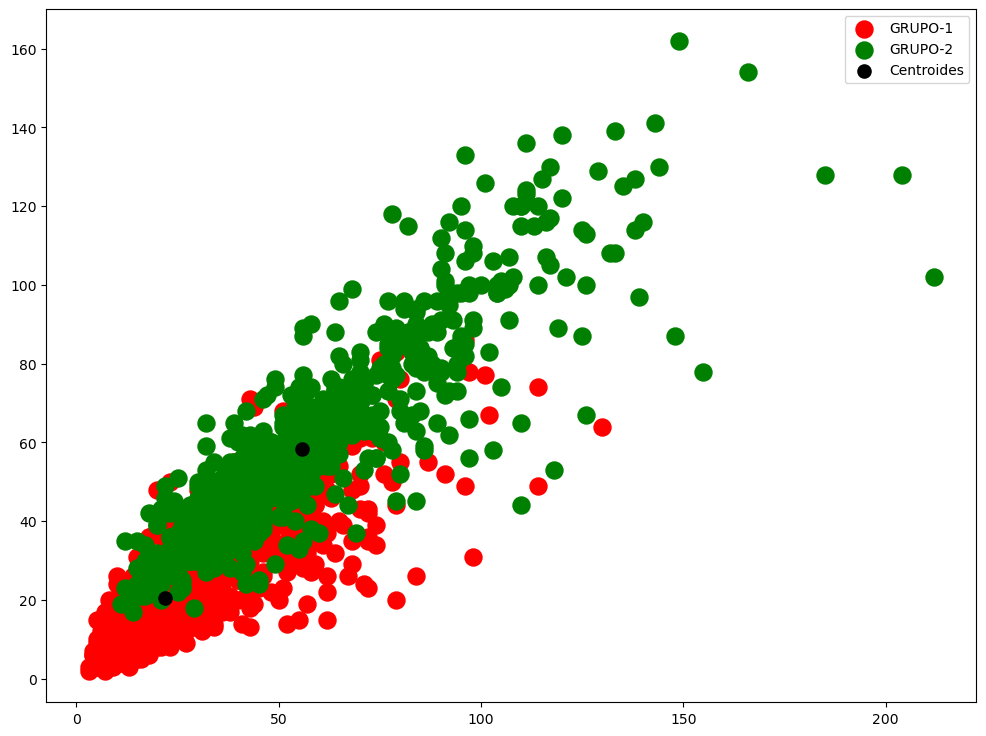

In [22]:
plt.figure(figsize = (12, 9))

### OS PONTOS GERAIS
plt.scatter(novo_df_ureia_tratado.values[y_ureia == 0, 0], novo_df_ureia_tratado.values[y_ureia == 0, 1], s = 150, c = "red", label = "GRUPO-1")
plt.scatter(novo_df_ureia_tratado.values[y_ureia == 1, 0], novo_df_ureia_tratado.values[y_ureia == 1, 1], s = 150, c = "green", label = "GRUPO-2")

### OS CENTROIDES
plt.scatter(kmeans_ureia.getCentroides()[:, 0], kmeans_ureia.getCentroides()[:, 1], s = 90, c = "black", label = "Centroides")

plt.legend()
plt.show()

<Figure size 1200x900 with 0 Axes>

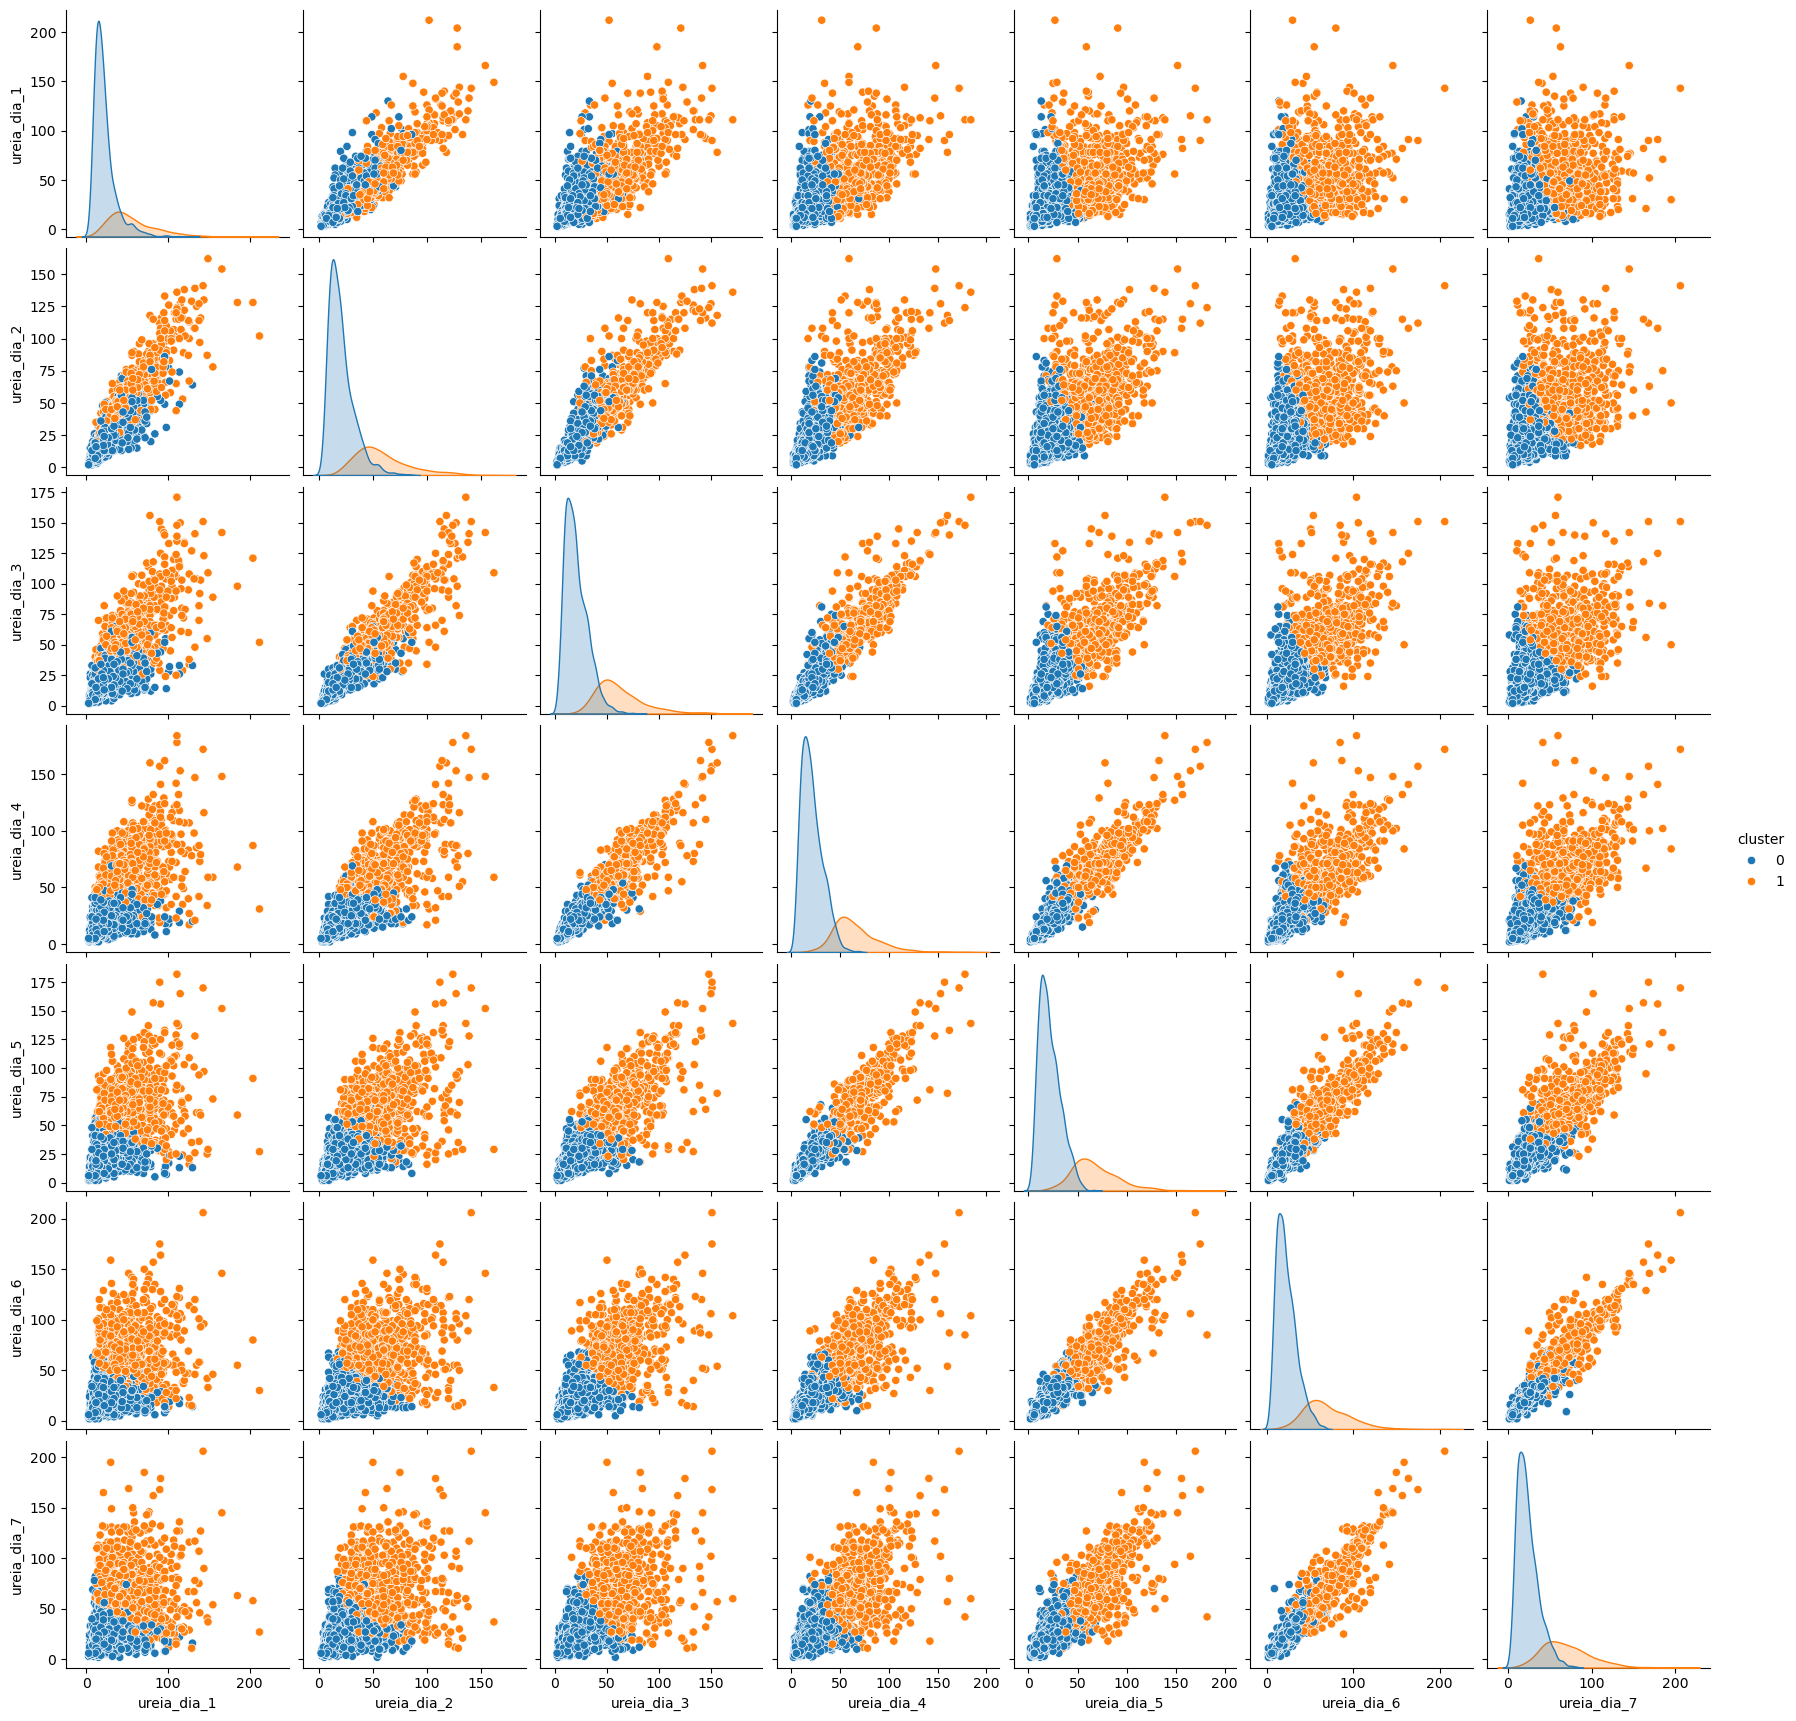

In [23]:
df_temporario = novo_df_ureia_tratado.copy()
df_temporario["cluster"] = y_ureia

plt.figure(figsize = (12, 9))

sns.pairplot(df_temporario, hue = "cluster")

plt.show()

### DATASET creatinina

#### Recebendo os hiper-parâmetros testados acima

In [24]:
hiperparametros_kmeans = ParametrosKmeans(path_arquivo_hiperparametros =  "./hiperparametros/hiperparametros_kmeans.txt", nome_dataset = "creatinina")

#### Criando o modelo - seguindo o GridSearchCV

In [25]:
kmeans_creatinina = Kmeans(nro_clusters = hiperparametros_kmeans.getNro_clusters(),
                           metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                           nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                           nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                           tolerancia = hiperparametros_kmeans.getTolerancia(),
                           semente = hiperparametros_kmeans.getSemente_randomica(),
                           algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

kmeans_creatinina.fit(novo_df_creatinina_tratado)

KMeans(algorithm='elkan', max_iter=500, n_clusters=3, n_init=13,
       random_state=42, tol=0.0004)

##### Verificando resultados do modelo - GridSearchCV

In [26]:
print("Inercia: %.3f" % kmeans_creatinina.getDistanciaAoQuadrado())
print("Labels: ", kmeans_creatinina.getLabels())

Inercia: 22064.760
Labels:  [0 0 1 ... 0 1 0]


In [27]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
y_creatinina = kmeans_creatinina.fit_predict(novo_df_creatinina_tratado)
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(novo_df_creatinina_tratado, y_creatinina, metric = metrica))

davies_bouldin = davies_bouldin_score(novo_df_creatinina_tratado, y_creatinina)
calinski = calinski_harabasz_score(novo_df_creatinina_tratado, y_creatinina)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.6962954978056743, 0.2999433027517647, 0.6855490937525839, 0.6962954978056743, 0.6855490937525839, 0.6962954978056743]
DAVIS-BOULDIN SCORE:  0.49006314473568446
CALINSKI-HARABASZ SCORE:  3114.420118971596


#### Criando o modelo - seguindo o método do joelho

In [28]:
joelhos_percebidos = [2, 3, 4, 5]

for i in joelhos_percebidos:
    kmeans_creatinina = Kmeans(nro_clusters = i,
                               metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                               nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                               nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                               tolerancia = hiperparametros_kmeans.getTolerancia(),
                               semente = hiperparametros_kmeans.getSemente_randomica(),
                               algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

    kmeans_creatinina.fit(novo_df_creatinina_tratado)
    print("Inercia: %.3f" % kmeans_creatinina.getDistanciaAoQuadrado())
    print("Labels: ", kmeans_creatinina.getLabels())

Inercia: 34847.979
Labels:  [1 1 0 ... 1 0 1]
Inercia: 22064.760
Labels:  [0 0 1 ... 0 1 0]
Inercia: 14935.379
Labels:  [1 1 0 ... 1 0 1]
Inercia: 12137.795
Labels:  [0 0 2 ... 0 2 0]


Acima, podemos notar que, a partir de `x = 2`, não há nenhum ganho adicional. Então para otimização dos testes `2` será escolhido como número de clusters.

In [29]:
kmeans_creatinina = Kmeans(nro_clusters = 2,
                           metodo_inicializacao = hiperparametros_kmeans.getMetodo_inicializacao(),
                           nro_tentativas_centroides = hiperparametros_kmeans.getNro_tentivas_centroide(),
                           nro_max_iteracao = hiperparametros_kmeans.getNro_maximo_iteracoes(),
                           tolerancia = hiperparametros_kmeans.getTolerancia(),
                           semente = hiperparametros_kmeans.getSemente_randomica(),
                           algoritmo = hiperparametros_kmeans.getAlgoritmo_kmeans())

y_creatinina = kmeans_creatinina.fit_predict(novo_df_creatinina_tratado)

##### Verificando resultados do modelo - Metodo do Joelho

In [30]:
print("Inercia: %.3f" % kmeans_creatinina.getDistanciaAoQuadrado())
print("Labels: ", kmeans_creatinina.getLabels())

Inercia: 34847.979
Labels:  [1 1 0 ... 1 0 1]


In [31]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
silhouette = []

for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
    silhouette.append(silhouette_score(novo_df_creatinina_tratado, y_creatinina, metric = metrica))

davies_bouldin = davies_bouldin_score(novo_df_creatinina_tratado, y_creatinina)
calinski = calinski_harabasz_score(novo_df_creatinina_tratado, y_creatinina)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  [0.6973551386950446, 0.31285994612640583, 0.6879646106382601, 0.6973551386950446, 0.6879646106382601, 0.6973551386950446]
DAVIS-BOULDIN SCORE:  0.7380076524339249
CALINSKI-HARABASZ SCORE:  2749.276958447551


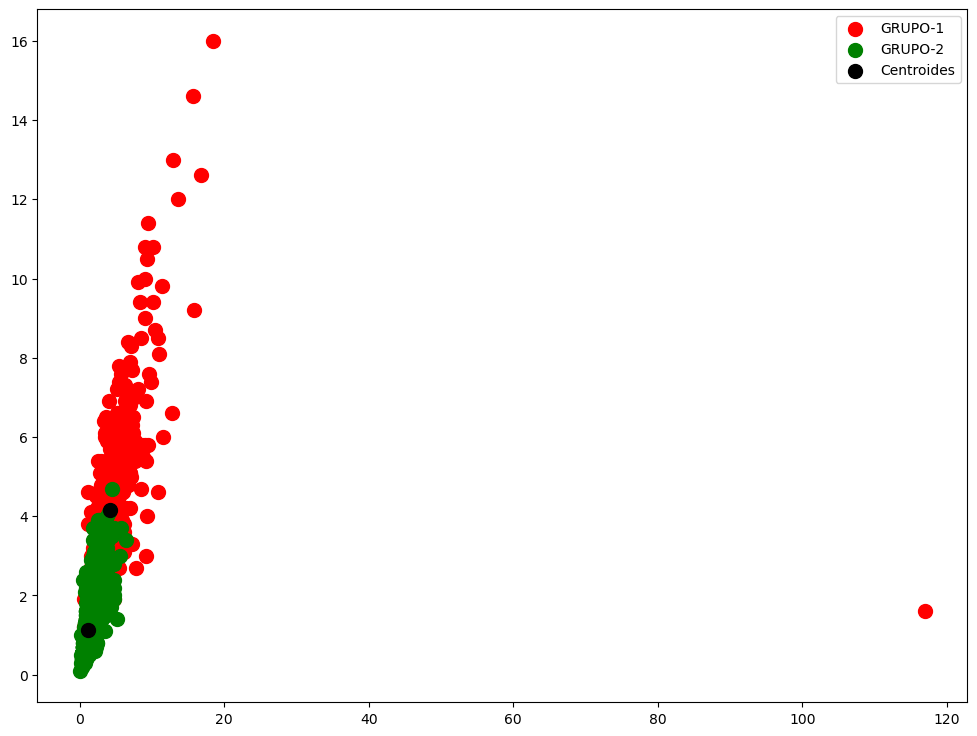

In [32]:
plt.figure(figsize = (12, 9))

### OS PONTOS GERAIS
plt.scatter(novo_df_creatinina_tratado.values[y_creatinina == 0, 0], novo_df_creatinina_tratado.values[y_creatinina == 0, 1], s = 100, c = "red", label = "GRUPO-1")
plt.scatter(novo_df_creatinina_tratado.values[y_creatinina == 1, 0], novo_df_creatinina_tratado.values[y_creatinina == 1, 1], s = 100, c = "green", label = "GRUPO-2")

### OS CENTROIDES
plt.scatter(kmeans_creatinina.getCentroides()[:, 0], kmeans_creatinina.getCentroides()[:, 1], s = 100, c = "black", label = "Centroides")

plt.legend()
plt.show()

<Figure size 1200x900 with 0 Axes>

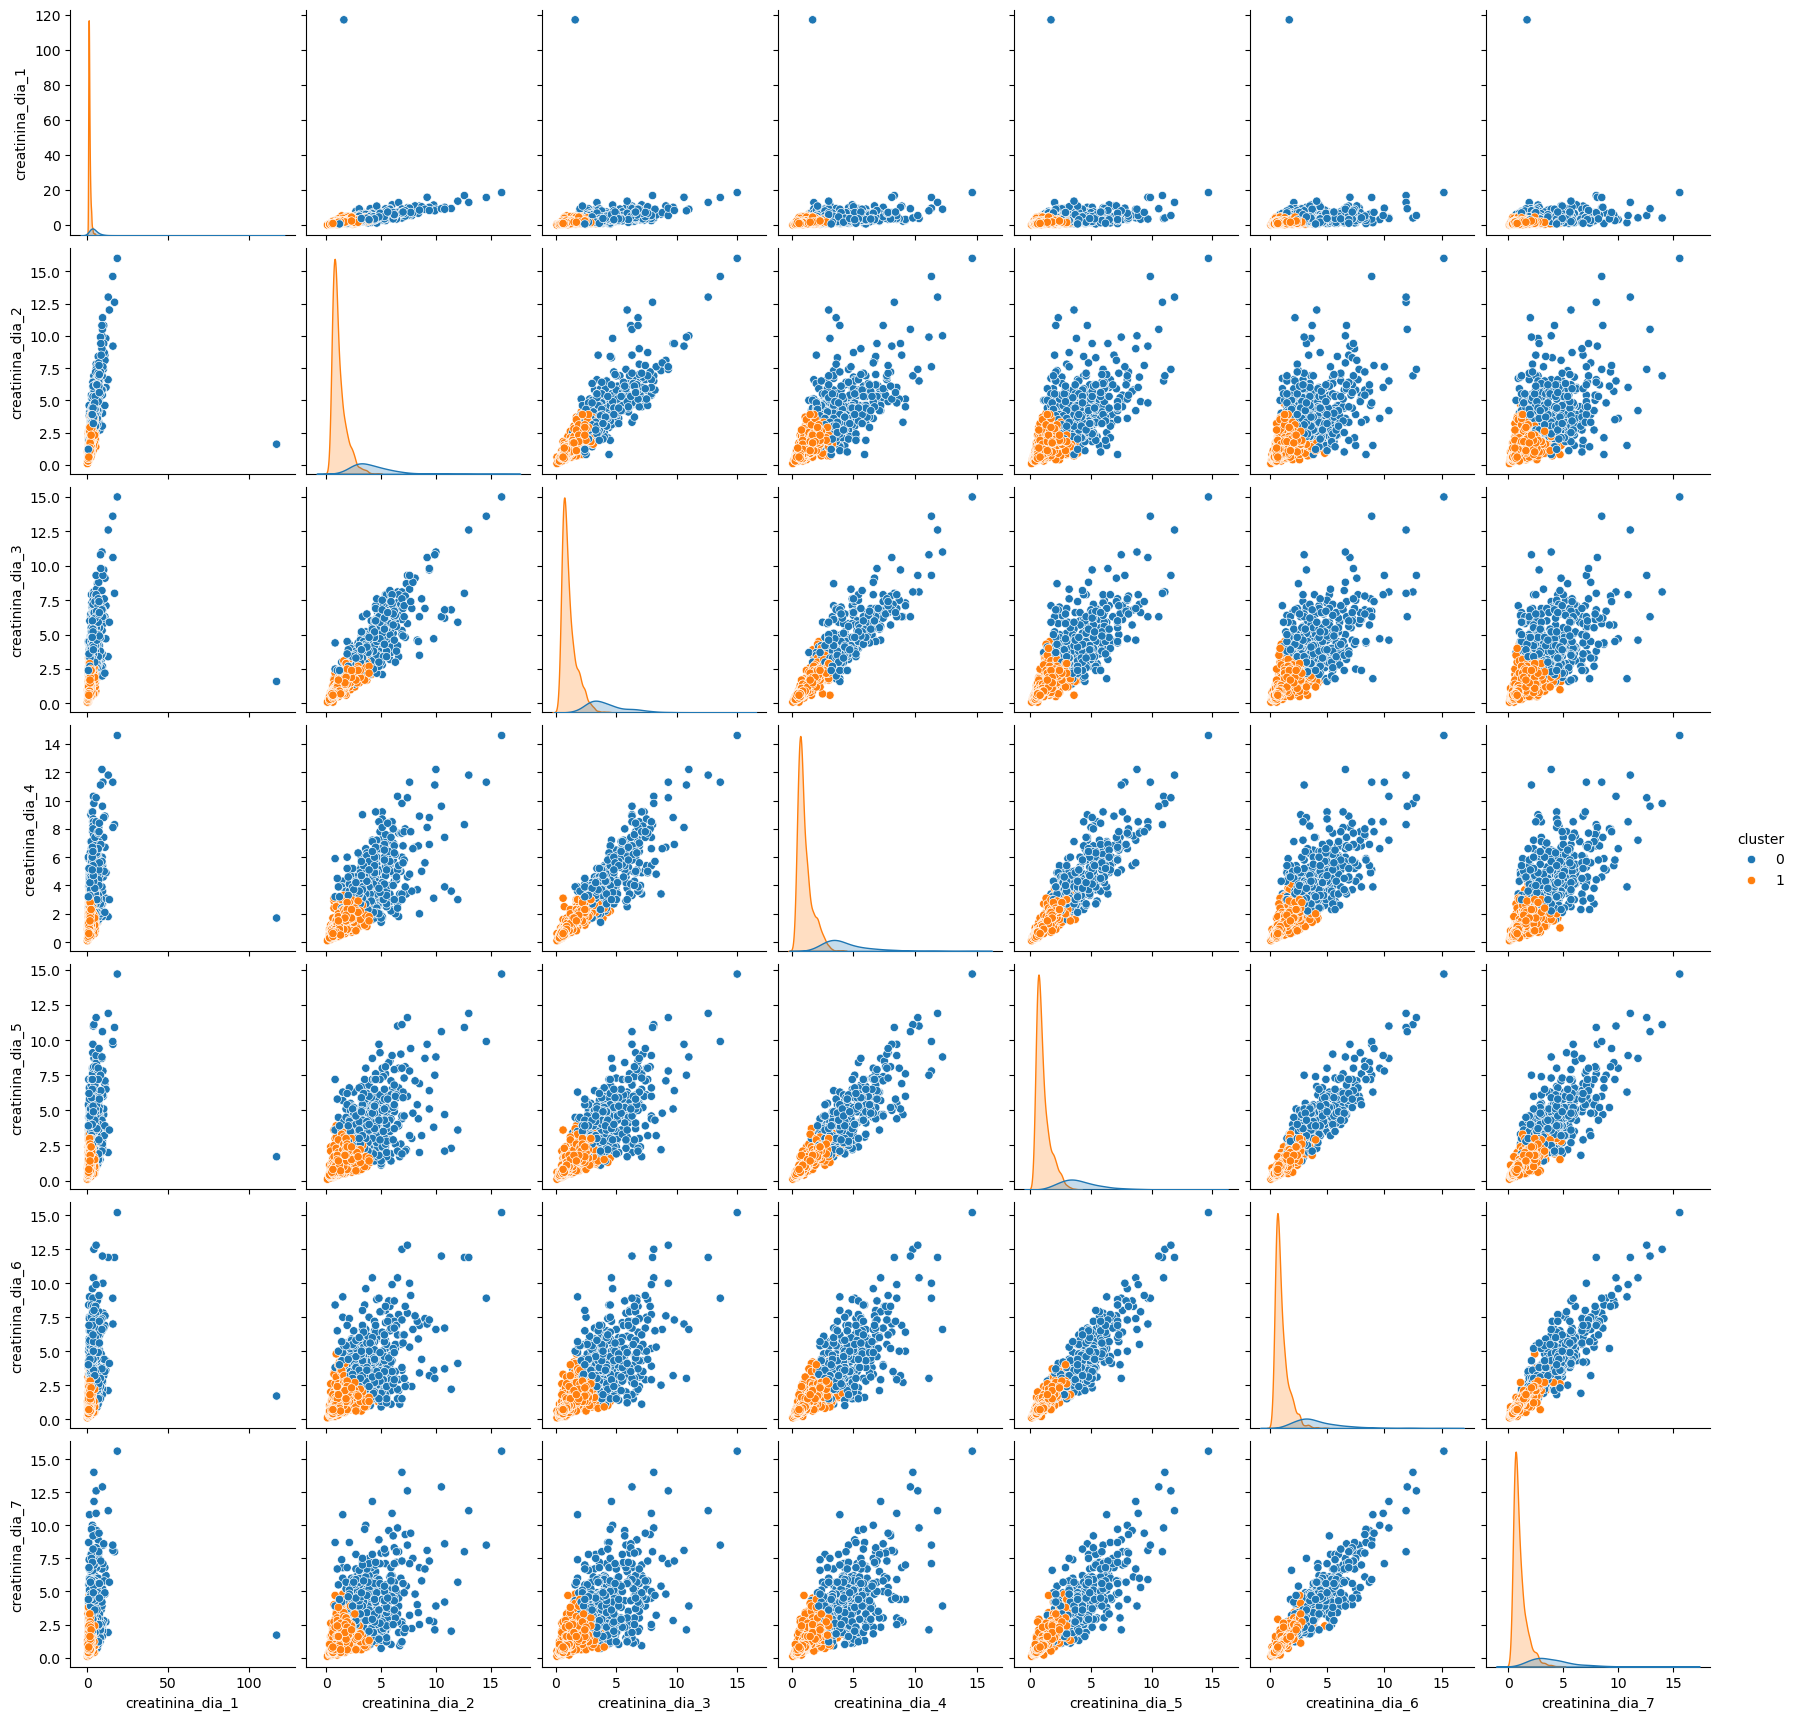

In [33]:
df_temporario = novo_df_creatinina_tratado.copy()
df_temporario["cluster"] = y_creatinina

plt.figure(figsize = (12, 9))

sns.pairplot(df_temporario, hue = "cluster")

plt.show()